In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [4]:
datos = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/TFM/SSSD/src/datasets/Electricity/LD2011_2014.txt', delimiter=';', index_col=0, parse_dates=['Unnamed: 0'], decimal = ',', dtype='float')

In [5]:
datos.head

<bound method NDFrame.head of                        MT_001     MT_002    MT_003      MT_004     MT_005  \
2011-01-01 00:15:00  0.000000   0.000000  0.000000    0.000000   0.000000   
2011-01-01 00:30:00  0.000000   0.000000  0.000000    0.000000   0.000000   
2011-01-01 00:45:00  0.000000   0.000000  0.000000    0.000000   0.000000   
2011-01-01 01:00:00  0.000000   0.000000  0.000000    0.000000   0.000000   
2011-01-01 01:15:00  0.000000   0.000000  0.000000    0.000000   0.000000   
...                       ...        ...       ...         ...        ...   
2014-12-31 23:00:00  2.538071  22.048364  1.737619  150.406504  85.365854   
2014-12-31 23:15:00  2.538071  21.337127  1.737619  166.666667  81.707317   
2014-12-31 23:30:00  2.538071  20.625889  1.737619  162.601626  82.926829   
2014-12-31 23:45:00  1.269036  21.337127  1.737619  166.666667  85.365854   
2015-01-01 00:00:00  2.538071  19.914651  1.737619  178.861789  84.146341   

                         MT_006     MT_007   

In [6]:
datos.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tras analizar la cabecera de los datos, se identifica que la mayoría de puntos de consumo no empiezan hasta el inicio de 2012. También se identifica que la excesiva granularidad hace que muchos periodos tengan un consumo nulo.

Debido a esto, se van a eliminar todos los registros hasta el 1 de enero de 2012 y se van a remuestrear los datos acumulando el consumo diario de cada uno de los puntos.

In [7]:
datos.index = pd.to_datetime(datos.index)

In [8]:
datos.shape

(140256, 370)

In [9]:
datos_resampled1D = datos.resample('1D').sum()

In [10]:
datos_from2012 = datos_resampled1D.loc['2012-01-01 00:00:00':]

In [11]:
datos_from2012.shape

(1097, 370)

In [12]:
(datos == 0).sum().sum()

10457342

In [13]:
(datos == 0).sum().sum()/(datos.size)

0.20151071245783772

In [14]:
(datos_from2012 == 0).sum().sum()/(datos_from2012.size)

0.07062258247308384

Tras realizar estas operaciones se observa que se reducen las observaciones de 140256 a 1097, un 99,21%, aunque realizándolas la proporción de valores nulos desciende desde un 20,15% a un 7,06%.

In [15]:
estaciones_con_nulos = (datos_from2012 == 0).sum().sort_values(ascending =False)[(datos_from2012 == 0).sum().sort_values(ascending =False)>0]
estaciones_con_nulos

MT_178    929
MT_223    830
MT_133    802
MT_181    794
MT_116    779
MT_109    779
MT_112    773
MT_160    765
MT_337    747
MT_110    744
MT_117    744
MT_120    744
MT_121    744
MT_122    744
MT_111    744
MT_115    744
MT_113    744
MT_108    744
MT_107    744
MT_106    744
MT_179    719
MT_305    708
MT_289    698
MT_039    641
MT_186    634
MT_015    629
MT_347    623
MT_041    621
MT_165    613
MT_322    607
MT_012    606
MT_224    540
MT_185    537
MT_030    494
MT_170    424
MT_092    396
MT_152    366
MT_134    366
MT_370    366
MT_032    320
MT_255    312
MT_144    300
MT_332    234
MT_308    229
MT_184    201
MT_177    197
MT_033    194
MT_127    182
MT_167    173
MT_132    110
MT_024     89
MT_173     80
MT_131     50
MT_288     17
MT_146      6
MT_348      1
dtype: int64

Se puede observar cómo hay estaciones que no presentan consumo en varios días. Si se analizan los días sin consumo de las estaciones, hay varias que tienen días de consumo nulo igual a múltiplos de 365, por lo que se puede asumir que son estaciones que comienzan a emitir años más tarde.

Para evitar que esto tenga un impacto negativo en el desarrollo de las técnicas de imputación se van a eliminar las que tienen al menos un múltiplo de 365 de consumo igual a 0.

In [16]:
estaciones_eliminar = list(estaciones_con_nulos[:40].reset_index()['index'])

In [17]:
print(estaciones_eliminar)

['MT_178', 'MT_223', 'MT_133', 'MT_181', 'MT_116', 'MT_109', 'MT_112', 'MT_160', 'MT_337', 'MT_110', 'MT_117', 'MT_120', 'MT_121', 'MT_122', 'MT_111', 'MT_115', 'MT_113', 'MT_108', 'MT_107', 'MT_106', 'MT_179', 'MT_305', 'MT_289', 'MT_039', 'MT_186', 'MT_015', 'MT_347', 'MT_041', 'MT_165', 'MT_322', 'MT_012', 'MT_224', 'MT_185', 'MT_030', 'MT_170', 'MT_092', 'MT_152', 'MT_134', 'MT_370', 'MT_032']


In [18]:
datos_from2012.shape

(1097, 370)

In [19]:
datos_from2012_filtered = datos_from2012.drop(estaciones_eliminar, axis = 1)
datos_from2012_filtered.shape

(1097, 330)

In [20]:
(datos_from2012_filtered == 0).sum().sum()

2375

In [21]:
(datos_from2012_filtered == 0).sum().sum()/(datos_from2012_filtered.size)

0.006560592248832905

In [22]:
dataset = datos_from2012_filtered

Con esta última transformación se tienen 0,6% de registros con consumo nulo en el dataset

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2012-01-01 to 2015-01-01
Freq: D
Columns: 330 entries, MT_001 to MT_369
dtypes: float64(330)
memory usage: 2.8 MB


A continuación se van a analizar las métricas de distribución del dataset final.

In [24]:
metricas = dataset.describe().T
metricas.head()

,count,mean,std,min,25%,50%,75%,max
MT_001,1097.0,507.681309,504.996770,2.538071,180.203046,225.888325,727.157360,1670.050761
MT_002,1097.0,2655.336356,374.801221,19.914651,2455.192034,2640.825036,2842.105263,3786.628734
MT_003,1097.0,373.117744,875.986875,1.737619,165.942659,169.417897,213.727194,7524.761077
MT_004,1097.0,10507.627973,1726.091895,178.861789,9219.512195,10256.097561,11560.975610,16048.780488
MT_005,1097.0,4761.328012,1192.980278,84.146341,3750.000000,4608.536585,5660.975610,7525.609756


In [25]:
metricas_de_metricas = pd.DataFrame()
metricas_de_metricas['mean'] = metricas['mean'].describe()
metricas_de_metricas['std'] = metricas['std'].describe()
metricas_de_metricas

,mean,std
count,3.300000e+02,3.300000e+02
mean,5.944710e+04,1.225315e+04
std,2.952342e+05,1.020075e+05
min,3.731177e+02,9.198841e+01
25%,6.754283e+03,1.056739e+03
50%,1.309839e+04,2.267617e+03
75%,3.407699e+04,5.608371e+03
max,4.808337e+06,1.828035e+06


In [26]:
metricas['std'].std()

102007.48080423231

Se puede observar que las medias varían mucho entre cada serie temporal, por lo que para favorecer la eficiencia de los modelos de DL será necesario escalar los datos.

En las series temporales es necesario analizar los componentes de temporalidad y tendencia, para poder extraer la duración de los ciclos en caso de haberlo.

Para ello, vamos a representar algunas series temporales a lo largo del margen temporal de estudio para identificar las posibles temporalidades y tendencias.

In [27]:
dataset.to_csv('/content/drive/MyDrive/ColabNotebooks/TFM/SAITS/dataset_generating_scripts/data/Electricity_processed.txt', sep=';', decimal = ',')


In [28]:
print(dataset.index.to_period('M').unique())
print(dataset.index.to_period('M').unique()[:24])
print(dataset.index.to_period('M').unique()[24:30])
print(dataset.index.to_period('M').unique()[30:])

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
             '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01'],
            dtype='period[M]')
PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
             '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]')
PeriodIndex(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06'], dtype='period[M]')
PeriodIndex(['2014-07',

Exportación del dataset segmentado con el tamaño de secuencia de 28 días.

In [29]:
%cd /content/drive/MyDrive/ColabNotebooks/TFM/SAITS/dataset_generating_scripts/
!python gene_UCI_electricity_dataset.py \
  --file_path data/Electricity_processed.txt \
  --artificial_missing_rate 0 \
  --seq_len 28 \
  --dataset_name Electricity_processed_0missingrate_28seqlen \
  --saving_path /content/drive/MyDrive/ColabNotebooks/TFM/generated_data

/content/drive/MyDrive/ColabNotebooks/TFM/SAITS/dataset_generating_scripts
2023-09-03 19:29:06,938 - Namespace(file_path='data/Electricity_processed.txt', artificial_missing_rate=0.0, seq_len=28, dataset_name='Electricity_processed_0missingrate_28seqlen', saving_path='/content/drive/MyDrive/ColabNotebooks/TFM/generated_data')
2023-09-03 19:29:07,058 - months selected as test set are <PeriodArray>
['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07',
 '2012-08', '2012-09', '2012-10']
Length: 10, dtype: period[M]
2023-09-03 19:29:07,059 - months selected as val set are <PeriodArray>
['2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05',
 '2013-06', '2013-07', '2013-08']
Length: 10, dtype: period[M]
2023-09-03 19:29:07,060 - months selected as train set are <PeriodArray>
['2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
 '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
 '2014-11', '2014-

In [30]:
dataset.T

,2012-01-01,2012-01-02,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-07,2012-01-08,2012-01-09,2012-01-10,...,2014-12-23,2014-12-24,2014-12-25,2014-12-26,2014-12-27,2014-12-28,2014-12-29,2014-12-30,2014-12-31,2015-01-01
MT_001,711.928934,1025.380711,1040.609137,1093.908629,1351.522843,1331.218274,1148.477157,1064.720812,1159.898477,1166.243655,...,250.000000,170.050761,151.015228,213.197970,211.928934,227.157360,248.730964,232.233503,229.695431,2.538071
MT_002,2497.866287,2576.102418,2876.244666,2509.957326,2640.825036,2510.668563,2696.301565,2661.450925,2582.503556,2309.388336,...,2176.386913,2259.601707,2177.809388,2173.541963,2145.803698,2131.578947,2212.660028,2205.547653,2273.115220,19.914651
MT_003,1999.131190,478.714162,774.978280,1369.244136,3965.247611,238.922676,2127.715030,229.365769,3200.695048,2473.501303,...,165.073849,166.811468,1.737619,161.598610,177.237185,151.172893,160.729800,165.073849,166.811468,1.737619
MT_004,11384.146341,12288.617886,11804.878049,11697.154472,11693.089431,11406.504065,12770.325203,12321.138211,10691.056911,10878.048780,...,14461.382114,13871.951220,12922.764228,13878.048780,14945.121951,14327.235772,14067.073171,14290.650407,14006.097561,178.861789
MT_005,5489.024390,6213.414634,6456.097561,6652.439024,6384.146341,6274.390244,6171.951220,5525.609756,5975.609756,6387.804878,...,7503.658537,6798.780488,6773.170732,6979.268293,7368.292683,6776.829268,7198.780488,7189.024390,7023.170732,84.146341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT_365,1715.775750,7487.614081,7830.508475,7508.474576,7352.020860,7567.144720,7868.318123,7590.612777,7629.726206,7705.345502,...,8075.619296,8059.973924,4267.275098,8024.771838,8439.374185,8169.491525,8438.070404,10615.384615,7415.906128,27.379400
MT_366,988.882387,2253.364541,2638.970158,2186.073727,2458.747806,2356.348742,1019.894675,692.217671,1752.486834,2252.194266,...,591.574020,537.156232,539.496782,1084.844939,698.069046,552.369807,1153.891164,892.334699,530.134582,4.095963
MT_367,41165.935031,54552.238806,55534.679543,53230.026339,56450.395083,56752.414399,50579.455663,41627.743635,53606.672520,55501.316945,...,58620.719930,54141.352063,46725.197542,53903.424056,53481.123793,45914.837577,53928.884987,56334.503951,50259.877085,628.621598
MT_368,4906.510851,14155.258765,15612.687813,14357.262104,18784.641068,16400.667780,5908.180301,4195.325543,14257.095159,16959.933222,...,16215.358932,13050.083472,4938.230384,12497.495826,7823.038397,4405.676127,12914.858097,15996.661102,13245.409015,131.886477


In [31]:
rand_points = np.random.choice(dataset.T.index.unique(), 5)
selected_points = dataset.T[dataset.T.index.isin(rand_points)]

In [32]:
melted = pd.melt(selected_points.reset_index(), id_vars='index')
melted.head()

,index,variable,value
0,MT_220,2012-01-01,131189.873418
1,MT_231,2012-01-01,32963.698630
2,MT_265,2012-01-01,12929.692132
3,MT_310,2012-01-01,52361.345291
4,MT_338,2012-01-01,11212.121212


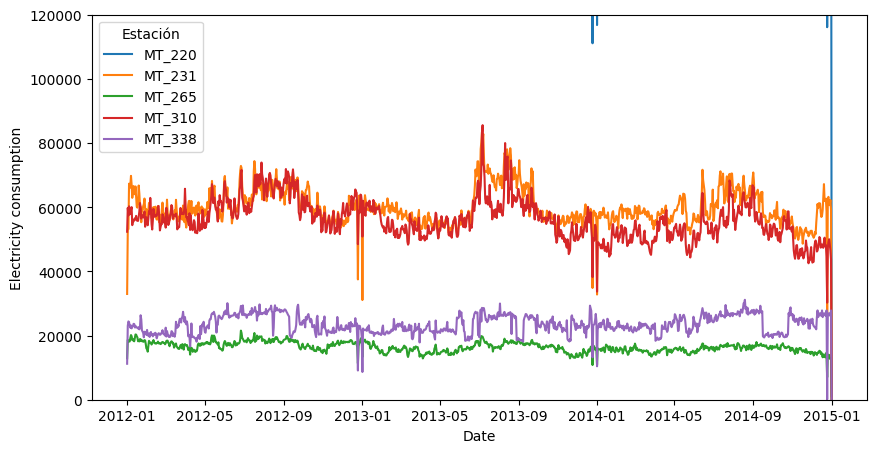

In [33]:
plt.figure(figsize=(10,5))

g = sns.lineplot(melted, hue = 'index',x ='variable', y = 'value')
g.set(ylabel = 'Electricity consumption', xlabel = 'Date', ylim=(0,120000))
g.legend(title='Estación', loc = 'upper left')

En las cinco estaciones aleatoriamente escogidas se puede identificar varias temporalidades. Es cierto que la granularidad escogida permite identificar más fácilmente en la estación MT_098 un ciclo que va desde mayo a enero, teniendo un pico en septiembre. Sin embargo, en el caso de MT_072, parece que experimenta un ciclo anual. Por otro lado, en MT_082 es más complicado percibir a simple vista estacionalidad y tendencia.

A continuación, vamos a analizar la tendencia y la estacionalidad de tres series aleatorias con un análisis más profundo.

In [34]:
rand_points = np.random.choice(dataset.T.index.unique(), 3)
selected_points = dataset.T[dataset.T.index.isin(rand_points)]
melted_2 = pd.melt(selected_points.reset_index(), id_vars='index')
melted_2.columns = ['station', 'date', 'consumption']

MT_011


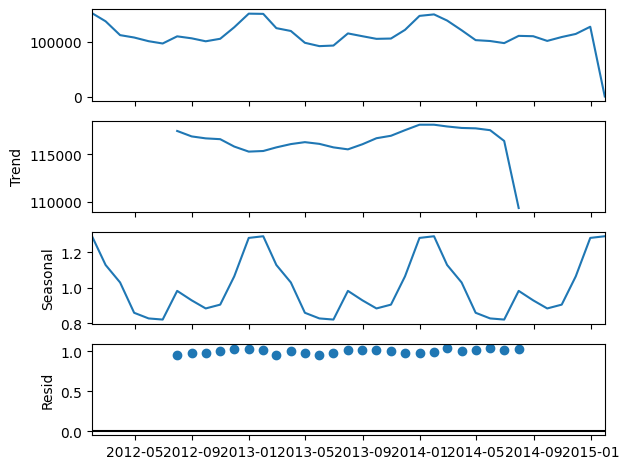

MT_162


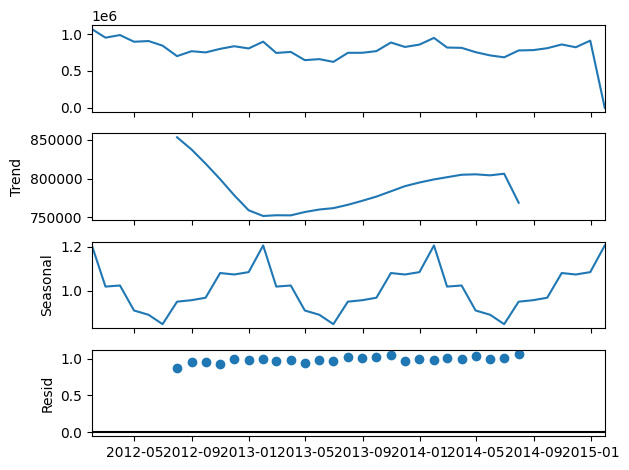

MT_355


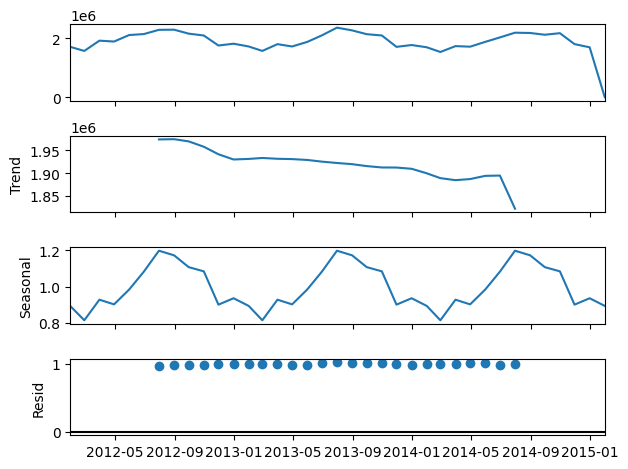

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
for i in melted_2['station'].unique():

  serie_i = melted_2[melted_2['station'] == i]
  serie_i = serie_i.set_index('date')[['consumption']]
  serie_i = serie_i.resample('1M').sum()
  print(i)
  result = seasonal_decompose(x = serie_i, model='multiplicative')
  result.plot()
  plt.show()


En todas las series se identifica una tendencia negativa y tres temporalidades en el periodo, una por año.

Por último se van a identificar correlaciones entre las series temporales

<Axes: >

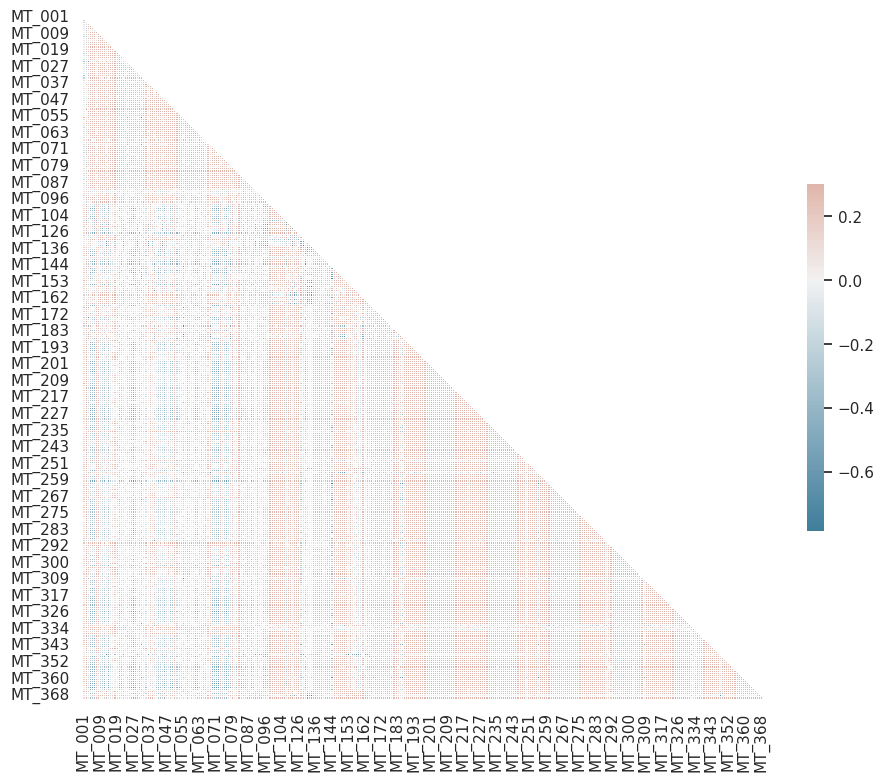

In [36]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Debido a la cantidad de variables disponibles, no se percibe a través del gráfico las relaciones entre ellas. Se identifican relaciones directas fuertes de más del 90% y relaciones indirectas de más del 70%

In [37]:
print(corr[(corr != 1) & (corr < -.60)].max().sort_values(ascending = True))

MT_033   -0.759996
MT_260   -0.726127
MT_177   -0.719442
MT_308   -0.711832
MT_153   -0.693613
            ...   
MT_363         NaN
MT_365         NaN
MT_366         NaN
MT_367         NaN
MT_369         NaN
Length: 330, dtype: float64


In [38]:
corr.loc['MT_325'].sort_values()

MT_072   -0.649634
MT_006   -0.591498
MT_027   -0.586806
MT_071   -0.584994
MT_070   -0.582878
            ...   
MT_314    0.923576
MT_199    0.925580
MT_216    0.936840
MT_362    0.958329
MT_325    1.000000
Name: MT_325, Length: 330, dtype: float64

In [39]:
corr.loc['MT_368'].sort_values()

MT_132   -0.784355
MT_130   -0.706164
MT_348   -0.651720
MT_124   -0.579562
MT_131   -0.515953
            ...   
MT_013    0.855349
MT_158    0.867779
MT_155    0.869215
MT_162    0.894459
MT_368    1.000000
Name: MT_368, Length: 330, dtype: float64

Se confirman las relaciones que se habían podido ver, por ejemplo, directas entre MT_325 y MT_362 e inversa entre MT_368 y MT_132, entre otras